<a href="https://colab.research.google.com/github/mujtaba86/week6/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 8: Lab to understand Kmeans clustering
## Prepared by Anum Paracha
## 17-07-2025

## **Step 1**: Generate Synthetic Dataset
We'll first create a simple 2D dataset with 500 points and 4 centers.





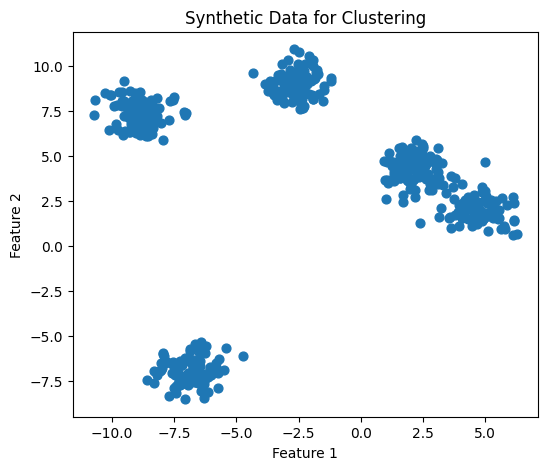

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)
# Plot data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.title('Synthetic Data for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## **Step 2**: Find the optimal number of clusters using **Elbow Method**

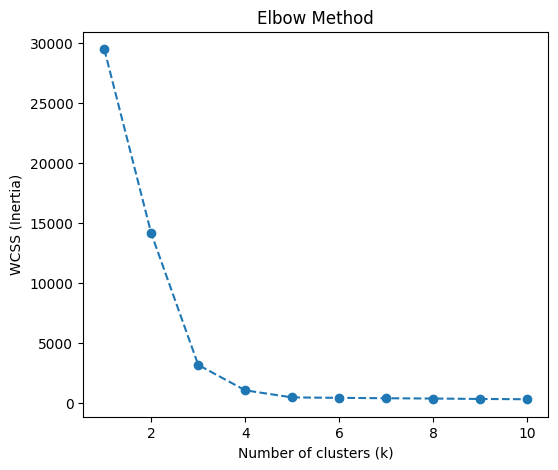

In [46]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

## Step 3: Evaluate the performance of the model using **Silhoutte score**

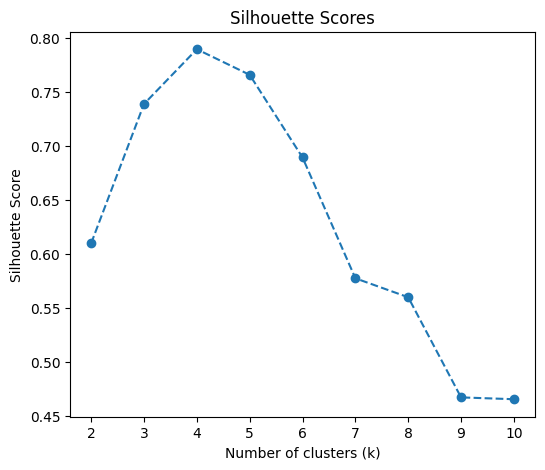

In [47]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(6, 5))
plt.plot(range(2, 11), sil_scores, 'o--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

## Step 4: Train model using Kmeans clustering and visualise it

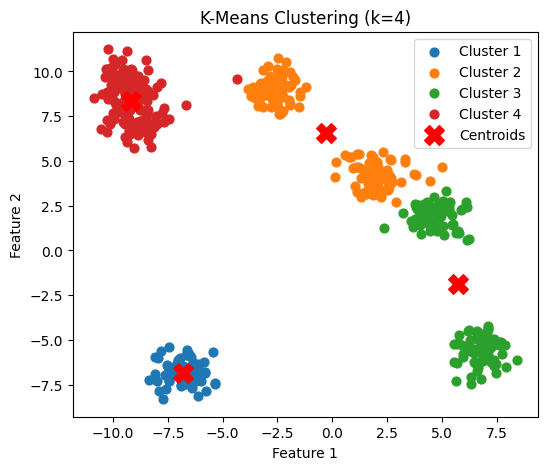

In [34]:
# Based on the above, choose k=4
optimal_k = 4
km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = km.fit_predict(X)
centroids = km.cluster_centers_

plt.figure(figsize=(6, 5))
for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=40, label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

***Task1*** Please download the dataset given in **Week 8** on the **moodle page**.
Perform some EDA to analsye the given unlabeled dataset and answer:

1.   How many features are there in the dataset
2.   Can we use the dataset for a **clsutering algorithm (Kmeans)**



`6 features


yes
```



In [32]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,duration,src_bytes,dst_bytes,failed_logins,count,srv_count
0,0,-0.066390,-0.907127,-0.921672,0.316200,1.112164,-1.484307
1,1,-0.810073,-0.625739,-1.282936,0.599994,-0.095576,-0.756345
2,2,-2.481295,0.671286,-2.689684,1.626519,-0.753272,-2.666897
3,3,1.089437,-1.206856,0.571102,0.173908,2.296566,-0.940681
4,4,0.177756,-0.829075,-2.002084,1.494689,1.617081,-0.188140


***Task2***

Write a paragraph describing the dataset.

In [ ]:
in this dataset there are 6 features ,ther are no null value ,there are two data types are there ,int and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     200 non-null    int64  
 1   duration       200 non-null    float64
 2   src_bytes      200 non-null    float64
 3   dst_bytes      200 non-null    float64
 4   failed_logins  200 non-null    float64
 5   count          200 non-null    float64
 6   srv_count      200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


***Task3***

* Read the dataset using Panda and present some features.
* Make sure you use EDA to demonstrate the features in the dataset.


In [ ]:
# Task 3 answer here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df.describe()
df.info()

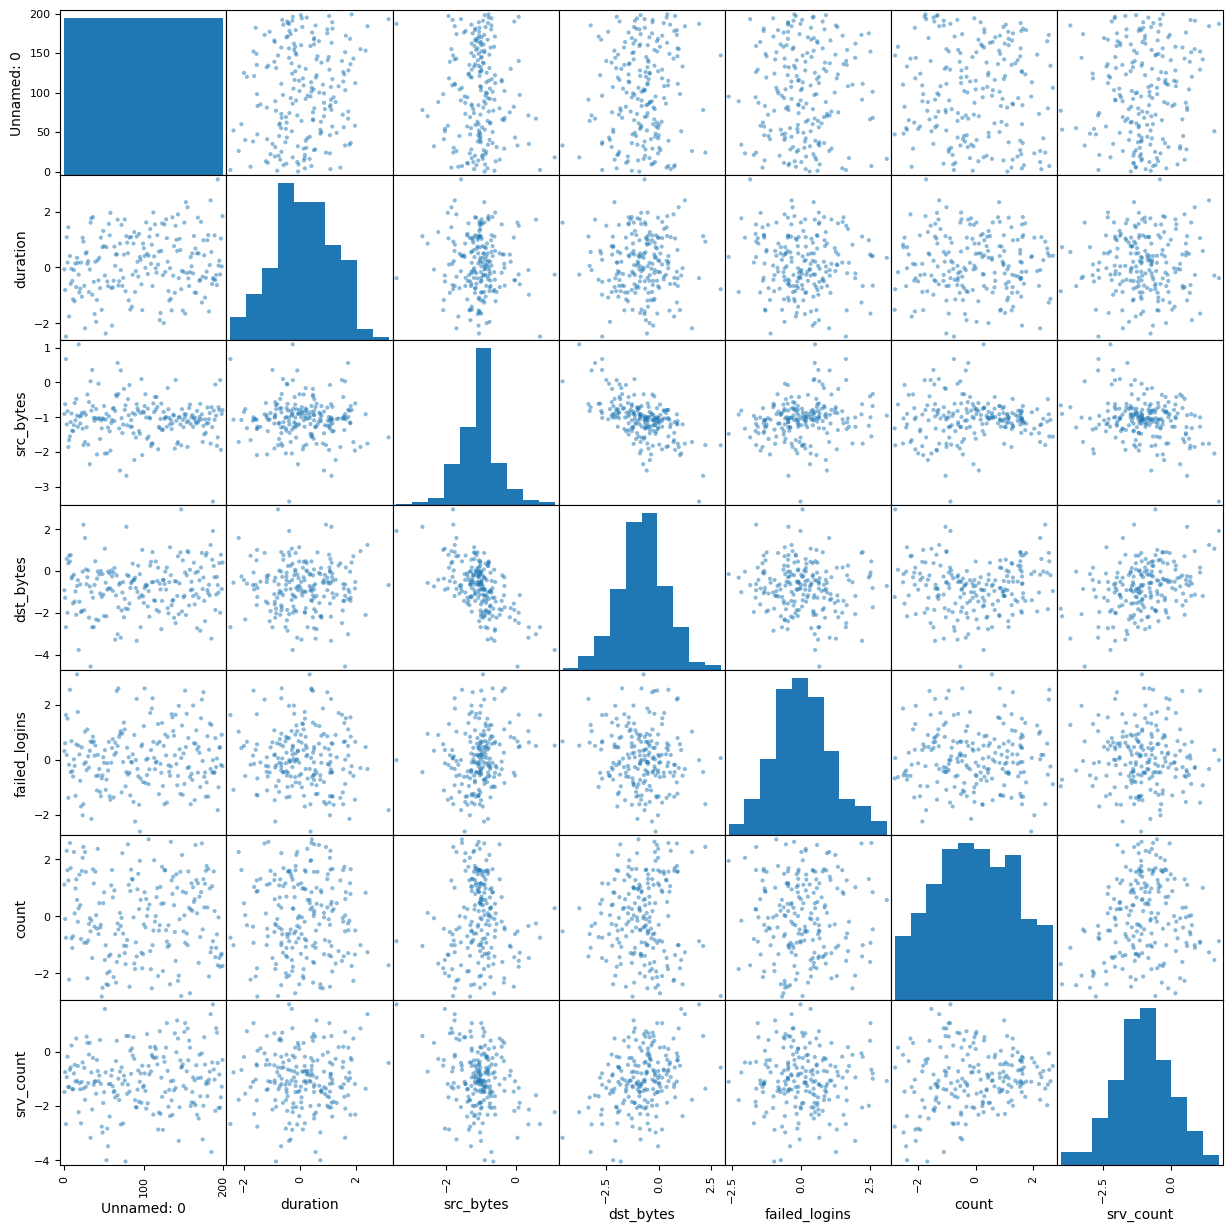

In [35]:
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

In [39]:
df['failed_logins'],df['count']

(0      0.316200
 1      0.599994
 2      1.626519
 3      0.173908
 4      1.494689
          ...   
 195    0.430840
 196    0.460075
 197   -0.186057
 198    0.907495
 199   -0.233991
 Name: failed_logins, Length: 200, dtype: float64,
 0      1.112164
 1     -0.095576
 2     -0.753272
 3      2.296566
 4      1.617081
          ...   
 195   -1.464533
 196   -1.772782
 197   -1.362218
 198   -1.317632
 199   -1.744403
 Name: count, Length: 200, dtype: float64)

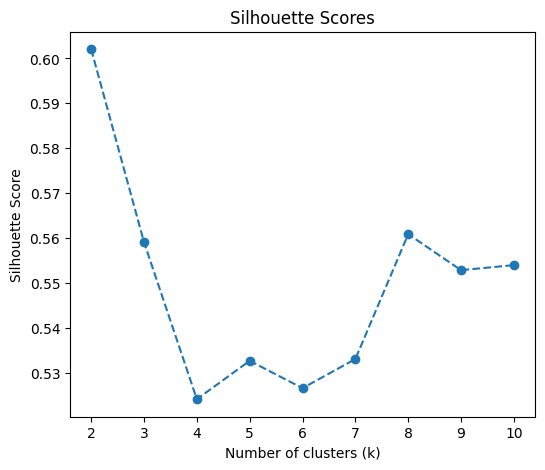

In [51]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(df[['count']])
    sil_scores.append(silhouette_score(df[['count']], km.labels_))

plt.figure(figsize=(6, 5))
plt.plot(range(2, 11), sil_scores, 'o--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(df[['failed_logins']])
    sil_scores.append(silhouette_score(df[['failed_logins']], km.labels_))

plt.figure(figsize=(6, 5))
plt.plot(range(2, 11), sil_scores, 'o--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

***Task4***

* Apply kmeans clustering algorithms to identify clusters or groups in the dataset.
* Make sure to follow Scikit learn library.
* Make sure you save your models.
* Use Elbow method and identify the best number of clusters
* Calculate the silhouette score and sum of square error (SSE) of the model and explain how this score evaluate the performance of the clustering model.

In [65]:
optimal_k = 4
km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = km.fit_predict(df[['failed_logins']],df[['count']])
print(labels)
centroids = km.cluster_centers_
print(centroids)

plt.figure(figsize=(6, 5))
for i in range(optimal_k):
    plt.scatter(df[['failed_logins']][labels == i,0], df[['count']][labels == i ,0], s=40, label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

[2 2 1 0 1 3 0 1 0 2 0 0 0 0 3 2 1 1 2 0 0 3 2 3 3 0 2 0 0 2 0 0 2 2 3 2 2
 2 0 2 0 3 0 0 0 3 3 0 0 0 0 2 3 0 0 0 2 3 3 0 2 2 3 0 2 2 1 2 1 2 2 2 3 2
 0 2 2 3 0 2 0 0 0 3 0 0 0 3 2 3 0 1 0 0 3 3 0 2 2 3 2 1 3 0 0 0 3 0 1 2 1
 1 2 0 0 0 0 2 2 3 2 0 0 2 3 2 3 2 0 3 2 0 0 0 0 1 1 2 2 0 1 0 3 0 1 2 3 0
 2 3 0 3 1 2 1 0 2 0 0 3 0 0 1 2 3 2 2 2 0 2 2 3 1 1 0 1 0 0 3 3 2 3 2 2 0
 2 0 0 0 0 2 0 0 3 3 2 2 0 2 0]
[[-0.2520485 ]
 [ 2.06052547]
 [ 0.72080477]
 [-1.36336472]]


InvalidIndexError: (array([False, False, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True]), 0)

<Figure size 600x500 with 0 Axes>

In [ ]:
# Task 4 answer here

***Task5***

Now is the time to compare classification and clsutering algorithms

Please explain the differences in EDA for classification and clustering models.
What are the metrics used for evaluating clustering model. Please list and explain the purpose of each metric.

Please feel free to ask for help.✌


In [ ]:
# Summarise task 5 answer here

In [ ]:
# By the end of these tasks you should cover good range from the CW1 and CW2 requirments.

# This is the end of the lab don't forgot to submit and all the best!
